# Country contribution

In [1]:
import xml.etree.ElementTree as et
from affiliation_parser import parse_affil
import pandas as pd
from matplotlib.pyplot import savefig
from matplotlib import rcParams

use trained model from /home/fernando/affiliation_parser_data


# Parsing XML file

In [2]:
tree = et.parse("sp_nov_2001_2018_pubmed_16012019_ed.xml") #loading xml file
root = tree.getroot()

In [3]:
with open("tabela_countries.txt", "w") as file:
    file.write("Journal" + "\t" + "Article Title" + "\t" + "Year" + "\t" + "Affiliation" + "\t" + "Country" + "\n")
    for article_set in root.findall("PubmedArticleSet"):
        for pubmed_article in article_set.findall("PubmedArticle"):
            for medline_citation in pubmed_article.findall("MedlineCitation"):
                for article in medline_citation.findall("Article"):
                    title = article.find("ArticleTitle").text
                    for author_list in article.findall("AuthorList"):
                        first_author = author_list[0]
                        aff_info = first_author.find("AffiliationInfo")
                        try:
                            affiliation = aff_info.find("Affiliation").text
                            country_fa = parse_affil(affiliation)["country"] #only country of last affiliation is extracted
                        except:
                            country_fa = ""
                    for journal in article.findall("Journal"):
                        journal_title = journal.find("Title").text
                        for journal_issue in journal.findall("JournalIssue"):
                            for pubdate in journal_issue.findall("PubDate"):
                                try:
                                    year = pubdate.find("Year").text
                                    pass
                                except:
                                    year = pubdate.find("MedlineDate").text.split(" ")[0]
                                file.write(journal_title + "\t" + title + "\t" + year + "\t" + affiliation + "\t" + country_fa + "\n")


              

In [4]:
df = pd.read_csv("tabela_countries-ed.txt", sep="\t") #this table does not contain the first record of tabela_countries.txt, since it was not found in the table generated from the medline file
df

,Journal,Article Title,Year,Affiliation,Country
0,International journal of systematic and evolut...,"Leucothrix arctica sp. nov., isolated from Arc...",2018,"2​Freshwater Bioresources Research Bureau, Nak...",south korea
1,International journal of systematic and evolut...,"Hyphobacterium indicum sp. nov., isolated from...",2018,"1​State Key Laboratory of Microbial Resources,...",china
2,"Journal of microbiology (Seoul, Korea)","Gramella fulva sp. nov., isolated from a dry s...",2019,"Department of Biology, College of Natural Scie...",south korea
3,"Journal of microbiology (Seoul, Korea)","Flavisolibacter aluminii sp. nov., a novel mem...",2019,Department of Agricultural Biotechnology and R...,south korea
4,International journal of systematic and evolut...,Sphingopyxis lindanitolerans sp. nov. strain W...,2018,"1​Institute of Biochemistry and Biophysics, Po...",poland
5,International journal of systematic and evolut...,"Mesosutterella multiformis gen. nov., sp. nov....",2018,1​Microbe Division/Japan Collection of Microor...,japan
6,International journal of systematic and evolut...,"Acinetobacter sichuanensis sp. nov., recovered...",2018,"1​Center of Infectious Diseases, West China Ho...",china
7,International journal of systematic and evolut...,"Enterobacter sichuanensis sp. nov., recovered ...",2018,"1​Center of Infectious Diseases, West China Ho...",china
8,International journal of systematic and evolut...,"Kribbella monticola sp. nov., a novel actinomy...",2018,1​Key Laboratory of Agriculture Biological Fun...,china
9,International journal of systematic and evolut...,"Halomonas litopenaei sp. nov., a moderately ha...",2018,"1​Fisheries College, Guangdong Ocean Universit...",china


In [5]:
df_elegibles = pd.read_csv("table_1_eligible.csv", index_col=0)
df_elegibles

,Journal,Title,Authors,Year,Abstract
0,International journal of systematic and evolut...,"Leucothrix arctica sp. nov., isolated from Arc...",['Baek Kiwoon' 'Choi Ahyoung' 'Lee Yung Mi' 'L...,2018,"A Gram-stain-negative, non-motile, oxidase- an..."
1,International journal of systematic and evolut...,"Hyphobacterium indicum sp. nov., isolated from...",['Ruan Chu-Jin' 'Zheng Xiao-Wei' 'Wang Jian' '...,2018,"A novel aerobic, Gram-stain-negative bacterium..."
4,International journal of systematic and evolut...,Sphingopyxis lindanitolerans sp. nov. strain W...,['Kaminski Michal A' 'Sobczak Adam' 'Spolnik G...,2018,"An aerobic, Gram-stain-negative, rod-shaped, n..."
5,International journal of systematic and evolut...,"Mesosutterella multiformis gen. nov., sp. nov....",['Sakamoto Mitsuo' 'Ikeyama Nao' 'Kunihiro Tad...,2018,"Two novel, obligately anaerobic, Gram-stain-ne..."
6,International journal of systematic and evolut...,"Acinetobacter sichuanensis sp. nov., recovered...",['Qin Jiayuan' 'Hu Yiyi' 'Feng Yu' 'Lv Xiaoju'...,2018,"A novel Acinetobacter strain, WCHAc060041(T), ..."
7,International journal of systematic and evolut...,"Enterobacter sichuanensis sp. nov., recovered ...",['Wu Wenjing' 'Feng Yu' 'Zong Zhiyong'],2018,"An Enterobacter strain, WCHECL1597(T), was rec..."
8,International journal of systematic and evolut...,"Kribbella monticola sp. nov., a novel actinomy...",['Song Wei' 'Duan Liping' 'Zhao Junwei' 'Jiang...,2018,"A novel actinobacterium, designated strain NEA..."
9,International journal of systematic and evolut...,"Halomonas litopenaei sp. nov., a moderately ha...",['Xue Ming' 'Wen Chong-Qing' 'Liu Lan' 'Fang B...,2018,"Two Gram-stain negative, moderately halophilic..."
10,International journal of systematic and evolut...,"Alsobacter soli sp. nov., a novel bacterium is...",['Sun Lina' 'Liu Hongming' 'Chen Wei' 'Huang K...,2018,"Strain SH9(T), an aerobic bacterium isolated f..."
11,International journal of systematic and evolut...,"Microbacterium halophytorum sp. nov., a novel ...",['Li Yan-Ru' 'Zhu Zhi-Nan' 'Li Yu-Qian' 'Xiao ...,2018,"Two actinobacterial strains, YJYP 303(T) and Y..."


In [6]:
df = df[df.index.isin(df_elegibles.index)] #filter the occurences in df based on indexes of eligible records
df.to_csv("table_1_eligible_country.csv")


In [7]:
falta_country = df[df["Country"].isna()]
falta_country.to_csv("falta_country.csv") #itens without countries, information utilized in order to complete table with missing countries

# Processing curated table

In [8]:
completa = pd.read_csv("table_1_eligible_country_ed.csv", sep="\t", index_col=[0]) #curated table derived from "tabela_countries_s_2019.csv"

In [9]:
completa.head(5)

,Journal,Article Title,Year,Affiliation,Country
index,,,,,
0,International journal of systematic and evolut...,"Leucothrix arctica sp. nov., isolated from Arc...",2018,"2​Freshwater Bioresources Research Bureau, Nak...",south korea
1,International journal of systematic and evolut...,"Hyphobacterium indicum sp. nov., isolated from...",2018,"1​State Key Laboratory of Microbial Resources,...",china
4,International journal of systematic and evolut...,Sphingopyxis lindanitolerans sp. nov. strain W...,2018,"1​Institute of Biochemistry and Biophysics, Po...",poland
5,International journal of systematic and evolut...,"Mesosutterella multiformis gen. nov., sp. nov....",2018,1​Microbe Division/Japan Collection of Microor...,japan
6,International journal of systematic and evolut...,"Acinetobacter sichuanensis sp. nov., recovered...",2018,"1​Center of Infectious Diseases, West China Ho...",china


In [10]:
completa[completa["Country"].isna()]

,Journal,Article Title,Year,Affiliation,Country
index,,,,,


# Plots

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
completa["Country"].value_counts()

china                       2319
south korea                 2125
japan                        821
germany                      590
united states of america     447
india                        441
spain                        350
russia                       312
france                       269
taiwan                       244
united kingdom               215
belgium                      159
thailand                     158
australia                     87
portugal                      84
austria                       76
brazil                        62
italy                         62
czech republic                58
denmark                       56
netherlands                   53
iran                          52
turkey                        50
canada                        50
south africa                  44
mexico                        35
hungary                       34
algeria                       32
greece                        32
tunisia                       31
          

In [13]:
#Todos
all_papers_by_year = pd.DataFrame(completa["Year"].value_counts().reset_index())
all_papers_by_year.columns = ['year', 'count']
all_papers_by_year_sorted = all_papers_by_year.sort_values(by="year").reset_index(drop=True)
all_papers_by_year_sorted['cum_sum'] = all_papers_by_year_sorted["count"].cumsum()
all_papers_by_year_sorted

,year,count,cum_sum
0,2001,178,178
1,2002,231,409
2,2003,263,672
3,2004,325,997
4,2005,373,1370
5,2006,415,1785
6,2007,498,2283
7,2008,481,2764
8,2009,525,3289
9,2010,524,3813


In [14]:
#china
china = completa[completa["Country"] == "china"]
china_papers_by_year = pd.DataFrame(china["Year"].value_counts().reset_index())
china_papers_by_year.columns = ['year', 'count']
china_papers_by_year_sorted = china_papers_by_year.sort_values(by="year").reset_index(drop=True)
china_papers_by_year_sorted['cum_sum'] = china_papers_by_year_sorted["count"].cumsum()
china_papers_by_year_sorted["proportion"] = china_papers_by_year_sorted["count"]/all_papers_by_year_sorted["count"]
china_papers_by_year_sorted

,year,count,cum_sum,proportion
0,2001,6,6,0.033708
1,2002,14,20,0.060606
2,2003,14,34,0.053232
3,2004,22,56,0.067692
4,2005,40,96,0.107239
5,2006,33,129,0.079518
6,2007,50,179,0.100402
7,2008,78,257,0.162162
8,2009,134,391,0.255238
9,2010,94,485,0.179389


In [15]:
#korea
korea = completa[completa["Country"] == "south korea"]
korea_papers_by_year = pd.DataFrame(korea["Year"].value_counts().reset_index())
korea_papers_by_year.columns = ['year', 'count']
korea_papers_by_year_sorted = korea_papers_by_year.sort_values(by="year").reset_index(drop=True)
korea_papers_by_year_sorted['cum_sum'] = korea_papers_by_year_sorted["count"].cumsum()
korea_papers_by_year_sorted["proportion"] = korea_papers_by_year_sorted["count"]/all_papers_by_year_sorted["count"]
korea_papers_by_year_sorted

,year,count,cum_sum,proportion
0,2001,9,9,0.050562
1,2002,12,21,0.051948
2,2003,19,40,0.072243
3,2004,34,74,0.104615
4,2005,61,135,0.163539
5,2006,95,230,0.228916
6,2007,140,370,0.281124
7,2008,127,497,0.264033
8,2009,103,600,0.196190
9,2010,121,721,0.230916


In [16]:
japan = completa[completa["Country"] == "japan"]
japan_papers_by_year = pd.DataFrame(japan["Year"].value_counts().reset_index())
japan_papers_by_year.columns = ['year', 'count']
japan_papers_by_year_sorted = japan_papers_by_year.sort_values(by="year").reset_index(drop=True)
japan_papers_by_year_sorted['cum_sum'] = japan_papers_by_year_sorted["count"].cumsum()
japan_papers_by_year_sorted["proportion"] = japan_papers_by_year_sorted["count"]/all_papers_by_year_sorted["count"]
japan_papers_by_year_sorted

,year,count,cum_sum,proportion
0,2001,16,16,0.089888
1,2002,28,44,0.121212
2,2003,31,75,0.117871
3,2004,40,115,0.123077
4,2005,42,157,0.112601
5,2006,47,204,0.113253
6,2007,82,286,0.164659
7,2008,55,341,0.114345
8,2009,54,395,0.102857
9,2010,52,447,0.099237


In [17]:
germany = completa[completa["Country"] == "germany"]
germany_papers_by_year = pd.DataFrame(germany["Year"].value_counts().reset_index())
germany_papers_by_year.columns = ['year', 'count']
germany_papers_by_year_sorted = germany_papers_by_year.sort_values(by="year").reset_index(drop=True)
germany_papers_by_year_sorted['cum_sum'] = germany_papers_by_year_sorted["count"].cumsum()
germany_papers_by_year_sorted["proportion"] = germany_papers_by_year_sorted["count"]/all_papers_by_year_sorted["count"]
germany_papers_by_year_sorted

,year,count,cum_sum,proportion
0,2001,25,25,0.140449
1,2002,32,57,0.138528
2,2003,25,82,0.095057
3,2004,26,108,0.080000
4,2005,21,129,0.056300
5,2006,37,166,0.089157
6,2007,35,201,0.070281
7,2008,29,230,0.060291
8,2009,33,263,0.062857
9,2010,39,302,0.074427


In [18]:
#usa
usa = completa[completa["Country"] == "united states of america"]
usa_papers_by_year = pd.DataFrame(usa["Year"].value_counts().reset_index())
usa_papers_by_year.columns = ['year', 'count']
usa_papers_by_year_sorted = usa_papers_by_year.sort_values(by="year").reset_index(drop=True)
usa_papers_by_year_sorted['cum_sum'] = usa_papers_by_year_sorted["count"].cumsum()
usa_papers_by_year_sorted["proportion"] = usa_papers_by_year_sorted["count"]/all_papers_by_year_sorted["count"]
usa_papers_by_year_sorted

,year,count,cum_sum,proportion
0,2001,21,21,0.117978
1,2002,19,40,0.082251
2,2003,25,65,0.095057
3,2004,32,97,0.098462
4,2005,27,124,0.072386
5,2006,36,160,0.086747
6,2007,29,189,0.058233
7,2008,19,208,0.039501
8,2009,22,230,0.041905
9,2010,22,252,0.041985


In [19]:
#brazil
brazil = completa[completa["Country"] == "brazil"]
brazil_papers_by_year = pd.DataFrame(brazil["Year"].value_counts().reset_index())
brazil_papers_by_year.columns = ['year', 'count']
new_rows = pd.DataFrame([[2007, 0], [2008, 0], [2009, 0]], columns=["year", "count"])
brazil_papers_by_year = brazil_papers_by_year.append(new_rows)
brazil_papers_by_year_sorted = brazil_papers_by_year.sort_values(by="year").reset_index(drop=True)
brazil_papers_by_year_sorted['cum_sum'] = brazil_papers_by_year_sorted["count"].cumsum()
brazil_papers_by_year_sorted["proportion"] = brazil_papers_by_year_sorted["count"]/all_papers_by_year_sorted["count"]
brazil_papers_by_year_sorted

,year,count,cum_sum,proportion
0,2001,1,1,0.005618
1,2002,1,2,0.004329
2,2003,2,4,0.007605
3,2004,2,6,0.006154
4,2005,1,7,0.002681
5,2006,3,10,0.007229
6,2007,0,10,0.000000
7,2008,1,11,0.002079
8,2008,0,11,0.000000
9,2009,0,11,0.000000


# Figure 4

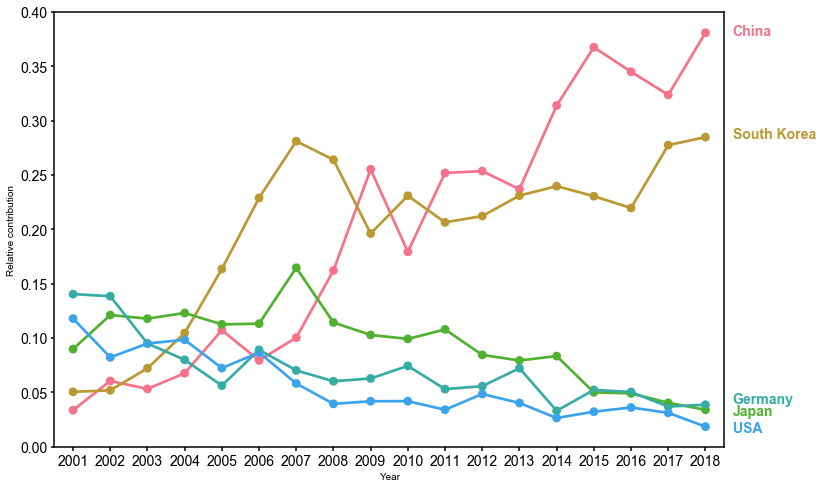

In [20]:
#Proportion of number of papers by year considering first author country affiliation

fig, ax = plt.subplots(figsize=(12,8))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)

data_set = [china_papers_by_year_sorted, korea_papers_by_year_sorted, japan_papers_by_year_sorted, germany_papers_by_year_sorted, usa_papers_by_year_sorted]
country_set = ["China", "South Korea", "Japan", "Germany", "USA"]
color_set = sns.color_palette("husl")
y_set = [0.84, 0.66, 0.18, 0.20, 0.15]


for d, c, i, y_pos in zip(data_set, country_set, color_set, y_set):
    sns.pointplot(x="year", y="proportion", data = d, color = i)
    fig.text(x = 0.91, y = y_pos, s = c, weight = "bold", family='sans-serif', fontsize=14, color = i)

ax.set_ylim([0,0.4])
ax.set_ylabel("Relative contribution")
ax.set_xlabel("Year")

ax.xaxis.set_tick_params(width=1.5, labelsize=14)
ax.yaxis.set_tick_params(width=1.5, labelsize=14)
#pal = sns.color_palette("Set1")
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

fig.savefig("relative_country.svg")
plt.show()


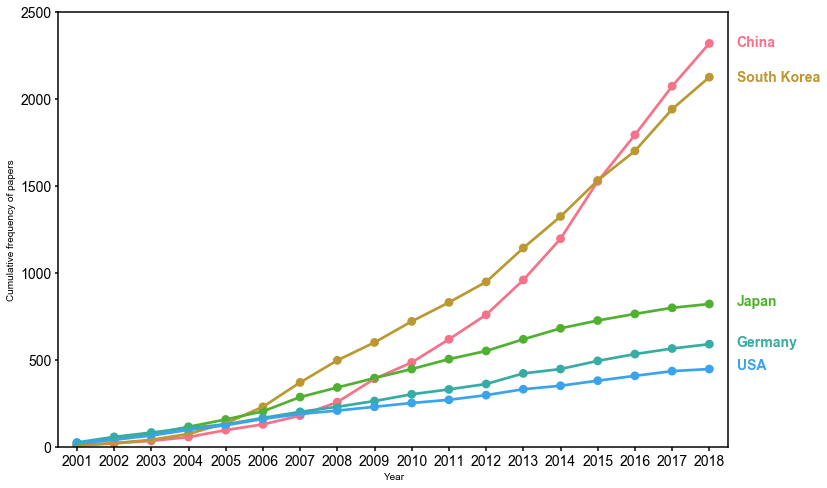

In [21]:
#Cumulative number of papers by year considering first author country affiliation

fig, ax = plt.subplots(figsize=(12,8))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)

data_set = [china_papers_by_year_sorted, korea_papers_by_year_sorted, japan_papers_by_year_sorted, germany_papers_by_year_sorted, usa_papers_by_year_sorted]
country_set = ["China", "South Korea", "Japan", "Germany", "USA"]
color_set = sns.color_palette("husl")
y_set = [0.82, 0.76, 0.37, 0.30, 0.26]


for d, c, i, y_pos in zip(data_set, country_set, color_set, y_set):
    sns.pointplot(x="year", y="cum_sum", data = d, color = i)
    fig.text(x = 0.91, y = y_pos, s = c, weight = "bold", family='sans-serif', fontsize=14, color = i)


ax.set_ylim([0,2500])
ax.set_ylabel("Cumulative frequency of papers")
ax.set_xlabel("Year")

ax.xaxis.set_tick_params(width=1.5, labelsize=14)
ax.yaxis.set_tick_params(width=1.5, labelsize=14)
#pal = sns.color_palette("Set1")
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

fig.savefig("cumulative_country.svg")
plt.show()